# Q1 

## Part 1 - Dimensionality Reduction using AutoEncoders:-

In [6]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt  
import csv
import math
import operator
from numpy import linalg as LA
import sys
from sklearn.model_selection import train_test_split

In [7]:
df = pd.read_csv('intrusion_detection/data1.csv') 
label=df['xAttack']
df1=df.drop(['xAttack'],axis=1)
df1.head()

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,25,193,441,0,0,0,0,0,0,...,15,255,1.00,0.00,0.07,0.04,0.00,0.04,0.0,0.0
1,0,38,0,0,0,0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.00,0.00,0.00,1.0,1.0
2,0,25,167,9724,0,0,0,0,0,0,...,39,255,1.00,0.00,0.03,0.06,0.00,0.00,0.0,0.0
3,0,20,1339,0,0,0,0,0,0,0,...,134,31,0.23,0.04,0.23,0.00,0.02,0.00,0.0,0.0
4,0,37,0,0,0,0,0,0,0,0,...,255,25,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.0


In [8]:
M=np.mean(df1)
SD=np.std(df1)
df1=(df1-M)/SD
# df1.head()
df1.shape

(24998, 29)

In [9]:
ds=df1.head(100)
ds.shape

(100, 29)

In [10]:
# ds=df1.head(1000)

In [11]:
instances = ds.shape[0]  
attributes = ds.shape[1] 
# samples=test1.shape[0]
# samples
ds.shape

(100, 29)

In [12]:
class layer:
    def __init__(self, NodesInLayer, ListOfNodeCounts, Activation_function):
        self.NodesInLayer = NodesInLayer
        self.Activation_function = Activation_function
        self.activations = np.zeros([NodesInLayer,1])
        if ListOfNodeCounts != 0:
            self.Layerwise_weights = np.random.normal(0, 1, size=(NodesInLayer, ListOfNodeCounts))
            self.Layerwise_bias = np.random.normal(0, 1, size=(1, ListOfNodeCounts))
        else:
            self.Layerwise_weights = None
            self.Layerwise_bias = None

In [13]:
    def relu(x):
        x[x < 0] = 0
        return x
    
    def RELU_derivative(x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def linear(x):
        return x
    
    def derlinear(x):
        return 1
    
    def sigmoid(x):  
        return 1/(1+np.exp(-x))

    def sigmoid_derivative(x):  
        return sigmoid(x) *(1-sigmoid (x))
    
    def tanh(x):
        return np.tanh(x)
    
    def tanh_derivative(x):
        return 1.0 - np.tanh(x)**2
    
    def softmax(A):  
        expA = np.exp(A)
        return expA / expA.sum(axis=1, keepdims=True)

In [14]:
class Neural_Net:
    def __init__(self, Layer_count, Node_count, Activation_function, Error_calc_function, Type_Activation_func):
        self.Layer_count = Layer_count
        self.Node_count = Node_count
        self.layers = []
        self.error = 0
        self.lr = 0.0001
        self.Error_calc_function = Error_calc_function
        self.Type_Activation_func = Type_Activation_func

        if not Layer_count == len(Node_count):
            raise ValueError("Number of layers must match number node counts...!")

        for i in range(Layer_count):
            if i != Layer_count-1:
                layer_i = layer(Node_count[i], Node_count[i+1], Activation_function[i])
            else:
                layer_i = layer(Node_count[i], 0, Activation_function[i])
            self.layers.append(layer_i) 
    
    def calculate_error(self,one_hot_data):
        if self.Error_calc_function == "mean_squared":
            self.error = np.mean(np.divide(np.square(np.subtract(one_hot_data, self.layers[self.Layer_count-1].activations)), 2))
#             print(self.error)
        elif self.Error_calc_function == "cross_entropy":
            self.error = np.sum(-one_hot_data * np.log(self.layers[-1].activations))
#             print(self.error)
    
            
    def forward_propagation(self, dataset):
        self.layers[0].activations = dataset
        for i in range(self.Layer_count-1):
            temp = np.add(np.dot(self.layers[i].activations, self.layers[i].Layerwise_weights), self.layers[i].Layerwise_bias)
            if self.layers[i+1].Activation_function == "sigmoid":
                self.layers[i+1].activations = sigmoid(temp)
            elif self.layers[i+1].Activation_function == "softmax":
                self.layers[i+1].activations = softmax(temp)
            elif self.layers[i+1].Activation_function == "relu":
                self.layers[i+1].activations = relu(temp)
            elif self.layers[i+1].Activation_function == "tanh":
                self.layers[i+1].activations = tanh(temp)
            elif self.layers[i+1].Activation_function == "linear":
                self.layers[i+1].activations = linear(temp)
            else:
                self.layers[i+1].activations = temp
#             print(self.layers[i+1].activations.shape)
                
        
    def backward_propagation(self,one_hot_data):
        i = self.Layer_count-1
        dA_dZ=0
        if self.Type_Activation_func == "NonLinear_Activation":
#             dError_dZ=self.layers[i].activations-one_hot_data
            dError_dZ=self.layers[i].activations*(1-self.layers[i].activations)*(self.layers[i].activations-one_hot_data)
        elif self.Type_Activation_func == "Linear_Activation":
            dError_dZ=self.layers[i].activations-one_hot_data
        #         print('dError_dZ',dError_dZ.shape)
        dZ_dW=self.layers[i-1].activations
#         print('dZ_dW',dZ_dW.shape)
        dError_dW=np.dot(dZ_dW.T, dError_dZ)
#         print('dError_dW',dError_dW.shape)
        dE_dB=dError_dZ
#         print('dE_dB',dE_dB.shape)

        self.layers[i-1].Layerwise_weights -= self.lr * dError_dW
#         print(self.layers[i-1].Layerwise_bias.shape)
#         print('dE_dB',dE_dB.sum)
        self.layers[i-1].Layerwise_bias -= self.lr * dE_dB.sum(axis=0)
        
        
        for i in range(i-1,0,-1):
            dZ_dA=self.layers[i].Layerwise_weights
#             print('dZ_dA',dZ_dA)
            dE_dA=np.dot(dError_dZ,dZ_dA.T)
#             print('dE_dA',dE_dA)
            temp = np.add(np.dot(self.layers[i-1].activations, self.layers[i-1].Layerwise_weights), self.layers[i-1].Layerwise_bias)
            if self.layers[i].Activation_function == "sigmoid":
                dA_dZ=sigmoid_derivative(temp)
#                 print('dA_dZ',dA_dZ)
            if self.layers[i].Activation_function == "relu":
                dA_dZ=RELU_derivative(temp)
#                 print('dA_dZ',dA_dZ)
            if self.layers[i].Activation_function == "tanh":
                dA_dZ=tanh_derivative(temp)
#             if self.layers[i].Activation_function == "tanh":
#                 dA_dZ=tanh_derivative(temp)
            if self.layers[i].Activation_function == "linear":
                dA_dZ=derlinear(temp)
#                 print('dA_dZ',dA_dZ)

            dZ_dW=self.layers[i-1].activations
#             print('dZ_dW',dZ_dW)
            dError_dW=np.dot(dZ_dW.T,(dA_dZ*dE_dA))
#             print('dError_dW',dError_dW)
            dE_dB = dE_dA*dA_dZ
#             print('dE_dB',dE_dB)
            dError_dZ=dE_dB
#             print('dError_dZ',dError_dZ)
    
            self.layers[i-1].Layerwise_weights -= self.lr * dError_dW
            self.layers[i-1].Layerwise_bias -= self.lr * dE_dB.sum(axis=0)
                    
    def train_Neural_net(self, dataset, num_epochs, lr):
            self.lr = lr
            self.error = 0
            for j in range(num_epochs):
                i = 0
#                     print("Hi")   
                self.forward_propagation(dataset)
                self.backward_propagation(dataset)
                self.calculate_error(dataset)
                print("Iter "+str(j)+" : "+str(self.error))

## a) 3-Layer Autoencoder with Non-Linear Activation Function:-

In [56]:
neural_network=Neural_Net(3, [29,14,29], [None,"sigmoid","sigmoid"],"mean_squared","NonLinear_Activation")

In [57]:
df1.values.shape

(24998, 29)

In [58]:
neural_network.train_Neural_net(df1.values,100,0.0001)

Iter 0 : 0.700208488450213
Iter 1 : 0.6017893358149514
Iter 2 : 0.5396402609567573
Iter 3 : 0.5013687055587711
Iter 4 : 0.47808583769432456
Iter 5 : 0.45959712356032295
Iter 6 : 0.4470287611691351
Iter 7 : 0.43796563973710967
Iter 8 : 0.43089178317848065
Iter 9 : 0.425235979416552
Iter 10 : 0.42049069920362425
Iter 11 : 0.41642059078595145
Iter 12 : 0.4128782079480181
Iter 13 : 0.40966537112909324
Iter 14 : 0.4065264664760662
Iter 15 : 0.4031143211476148
Iter 16 : 0.39884757604383275
Iter 17 : 0.39258748810174154
Iter 18 : 0.3840595286551755
Iter 19 : 0.3790224416177616
Iter 20 : 0.37679372514198106
Iter 21 : 0.3751432535567571
Iter 22 : 0.3737442239335444
Iter 23 : 0.37251150247150483
Iter 24 : 0.3714016793503609
Iter 25 : 0.37038349869481735
Iter 26 : 0.3694394480299886
Iter 27 : 0.3685565608518898
Iter 28 : 0.3677208734723843
Iter 29 : 0.36691119494514857
Iter 30 : 0.36617406196616703
Iter 31 : 0.365473878470673
Iter 32 : 0.36480650892683664
Iter 33 : 0.3641684319446774
Iter 34 : 0.

In [60]:
neural_network.error

0.34652488792250574

In [61]:
# df1[:1,:]

In [62]:
# neural_network.layers[-1].activations[:1,:]

In [63]:
neural_network.forward_propagation(df1)

In [64]:
ans=neural_network.layers[1].activations
ans.shape

(24998, 14)

In [261]:
k=5
n = ans.shape[0]
c = ans.shape[1]
mean = np.mean(ans, axis = 0)
std = np.std(ans, axis = 0)
centers = np.random.randn(k,c)*std + mean
# plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

In [262]:
from copy import deepcopy
co = np.zeros(centers.shape)
cn = deepcopy(centers) 
# ans.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))
marg = LA.norm(cn - co)
while marg != 0:
    for i in range(k):
        distances[:,i] = LA.norm(ans - cn[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    co = deepcopy(cn)
    for i in range(k):
        cn[i] = np.mean(ans[clusters == i], axis=0)
    marg = LA.norm(cn - co)
# centers_new   
# plt.scatter(cn[:,0], cn[:,1], marker='*', c='r', s=150)
print(clusters)

[3 4 3 ... 1 0 2]


In [263]:
kmlist=[]
for i in range(len(label)):
    if label[i]=='dos':
        kmlist.append(0)
    if label[i]=='normal':
        kmlist.append(1)
    if label[i]=='probe':
        kmlist.append(2)
    if label[i]=='r2l':
        kmlist.append(3)
    if label[i]=='u2r':
        kmlist.append(4)
len(kmlist)

24998

In [264]:
from sklearn.metrics.cluster import contingency_matrix
res=contingency_matrix(clusters,kmlist)
# print(res)
for i,item in enumerate(res):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  39.261168384879724
Purity of Cluster - 1 :  86.7147510469986
Purity of Cluster - 2 :  98.79448075526507
Purity of Cluster - 3 :  98.00711743772241
Purity of Cluster - 4 :  45.600261694471705


In [265]:
pure=0
for i in res:
    pure+=max(i)
#     print(max(i))
A1=pure/len(label)
print('K-means Purity:', A1)

K-means Purity: 0.8440275222017761


In [266]:
from sklearn.mixture import GaussianMixture
GMM=GaussianMixture(n_components=5).fit(ans)
gmmlabel=GMM.predict(ans)
np.unique(gmmlabel)

array([0, 1, 2, 3, 4])

In [267]:
res1=contingency_matrix(gmmlabel,kmlist)
# print(res1)
for i,item in enumerate(res1):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  100.0
Purity of Cluster - 1 :  91.84837302918484
Purity of Cluster - 2 :  80.1819363222872
Purity of Cluster - 3 :  52.86648711042709
Purity of Cluster - 4 :  73.50604490500864


In [268]:
pure1=0
for i in res1:
    pure1+=max(i)
#     print(max(i))
A2=pure1/len(label)
print('GMM Purity:', A2)

GMM Purity: 0.8273061844947596


In [269]:
from sklearn.cluster import AgglomerativeClustering
cc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
aclabel=cc.fit_predict(ans)
np.unique(aclabel)

array([0, 1, 2, 3, 4])

In [270]:
res2=contingency_matrix(aclabel,kmlist)
# print(res2)
for i,item in enumerate(res2):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  53.461738677772
Purity of Cluster - 1 :  50.0
Purity of Cluster - 2 :  100.0
Purity of Cluster - 3 :  100.0
Purity of Cluster - 4 :  100.0


In [271]:
pure2=0
for i in res2:
    pure2+=max(i)
#     print(max(i))
A3=pure2/len(label)
print('Hierarchical Purity:', A3)

Hierarchical Purity: 0.5346427714217138


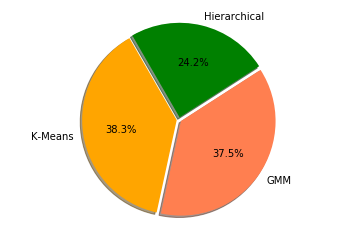

In [272]:
import matplotlib.pyplot as plt
slices_hours = [A1, A2, A3]
activities = ['K-Means', 'GMM', 'Hierarchical']
explode = (0.025, 0.025, 0.025)
colors = ['orange', 'coral','green']
fig1, ax1 = plt.subplots()
ax1.pie(slices_hours, explode=explode,colors=colors, labels=activities, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax1.axis('equal') 
plt.show()

## b) 3-Layer Autoencoder with Linear Activation Function:-

In [15]:
neural_network=Neural_Net(3, [29,14,29], [None,"linear","linear"],"mean_squared","Linear_Activation")

In [16]:
df1.values.shape

(24998, 29)

In [17]:
neural_network.train_Neural_net(df1.values,100,0.0000001)

Iter 0 : 142.48136130408653
Iter 1 : 74.68600829636104
Iter 2 : 53.00231427084624
Iter 3 : 40.586711912687576
Iter 4 : 32.44383749038422
Iter 5 : 26.698058476020822
Iter 6 : 22.443087397500168
Iter 7 : 19.180809422083602
Iter 8 : 16.61286000845797
Iter 9 : 14.549017468483637
Iter 10 : 12.862087583737171
Iter 11 : 11.463751524424639
Iter 12 : 10.290775977313816
Iter 13 : 9.296723124726045
Iter 14 : 8.446751301378825
Iter 15 : 7.714236219351158
Iter 16 : 7.0785079551989405
Iter 17 : 6.52329531654477
Iter 18 : 6.035632025578928
Iter 19 : 5.605072228048165
Iter 20 : 5.223117916232841
Iter 21 : 4.882794462403562
Iter 22 : 4.578331530165517
Iter 23 : 4.304920166652595
Iter 24 : 4.05852576568691
Iter 25 : 3.8357425435402805
Iter 26 : 3.633679226547147
Iter 27 : 3.4498684616143858
Iter 28 : 3.2821944382854924
Iter 29 : 3.1288346209091142
Iter 30 : 2.98821250717336
Iter 31 : 2.8589590723186005
Iter 32 : 2.7398811065945816
Iter 33 : 2.6299350620064827
Iter 34 : 2.528205331496865
Iter 35 : 2.4338

In [18]:
neural_network.error

0.7904546644747679

In [19]:
df1.iloc[:1,:]

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.114538,-0.425936,-0.010013,-0.034507,-0.090956,-0.026322,-0.021938,-0.021801,-0.027916,-0.044087,...,-1.690213,1.262872,1.067572,-0.441083,-0.253425,0.07103,-0.6395,-0.535332,-0.386077,-0.374982


In [20]:
neural_network.layers[-1].activations[:1,:]

array([[ 0.82259755, -0.92205697, -0.43818968, -0.16058607,  0.49403215,
         1.06618837, -0.33590128, -0.30321181,  1.49509252,  0.10308601,
         0.38123248,  0.15003592, -0.73600002, -0.14416482, -0.63101231,
        -0.38771991,  1.58142514, -1.37478043, -0.64091887, -2.38800437,
         1.33962059, -0.3570911 ,  0.03261833, -0.60224323,  0.27899306,
        -1.77499185, -1.95925155, -0.64696423,  0.36888362]])

In [21]:
neural_network.forward_propagation(df1)

In [22]:
ans=neural_network.layers[1].activations
ans.shape

(24998, 14)

In [23]:
k=5
n = ans.shape[0]
c = ans.shape[1]
mean = np.mean(ans, axis = 0)
std = np.std(ans, axis = 0)
centers = np.random.randn(k,c)*std + mean
# plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

In [24]:
from copy import deepcopy
co = np.zeros(centers.shape)
cn = deepcopy(centers) 
# ans.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))
marg = LA.norm(cn - co)
while marg != 0:
    for i in range(k):
        distances[:,i] = LA.norm(ans - cn[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    co = deepcopy(cn)
    for i in range(k):
        cn[i] = np.mean(ans[clusters == i], axis=0)
    marg = LA.norm(cn - co)
# centers_new   
# plt.scatter(cn[:,0], cn[:,1], marker='*', c='r', s=150)
print(clusters)

[3 4 3 ... 0 3 1]


In [25]:
kmlist=[]
for i in range(len(label)):
    if label[i]=='dos':
        kmlist.append(0)
    if label[i]=='normal':
        kmlist.append(1)
    if label[i]=='probe':
        kmlist.append(2)
    if label[i]=='r2l':
        kmlist.append(3)
    if label[i]=='u2r':
        kmlist.append(4)
len(kmlist)

24998

In [26]:
from sklearn.metrics.cluster import contingency_matrix
res=contingency_matrix(clusters,kmlist)
# print(res)
for i,item in enumerate(res):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  84.61538461538461
Purity of Cluster - 1 :  81.23219373219374
Purity of Cluster - 2 :  58.802104411169566
Purity of Cluster - 3 :  87.44329367456989
Purity of Cluster - 4 :  56.751142501038636


In [27]:
pure=0
for i in res:
    pure+=max(i)
#     print(max(i))
A4=pure/len(label)
print('K-means Purity:', A4)

K-means Purity: 0.7956236498919914


In [28]:
from sklearn.mixture import GaussianMixture
GMM=GaussianMixture(n_components=5).fit(ans)
gmmlabel=GMM.predict(ans)
np.unique(gmmlabel)

array([0, 1, 2, 3, 4])

In [29]:
res1=contingency_matrix(gmmlabel,kmlist)
# print(res1)
for i,item in enumerate(res1):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  87.79032048786817
Purity of Cluster - 1 :  100.0
Purity of Cluster - 2 :  86.8455497382199
Purity of Cluster - 3 :  52.57563368765331
Purity of Cluster - 4 :  47.57472704492572


In [30]:
pure1=0
for i in res1:
    pure1+=max(i)
#     print(max(i))
A5=pure1/len(label)
print('GMM Purity:', A5)

GMM Purity: 0.7827026162092967


In [31]:
from sklearn.cluster import AgglomerativeClustering
cc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
aclabel=cc.fit_predict(ans)
np.unique(aclabel)

array([0, 1, 2, 3, 4])

In [32]:
res2=contingency_matrix(aclabel,kmlist)
# print(res2)
for i,item in enumerate(res2):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  53.46166159756683
Purity of Cluster - 1 :  100.0
Purity of Cluster - 2 :  66.66666666666667
Purity of Cluster - 3 :  100.0
Purity of Cluster - 4 :  100.0


In [33]:
pure2=0
for i in res2:
    pure2+=max(i)
#     print(max(i))
A6=pure2/len(label)
print('Hierarchical Purity:', A6)

Hierarchical Purity: 0.5347227778222258


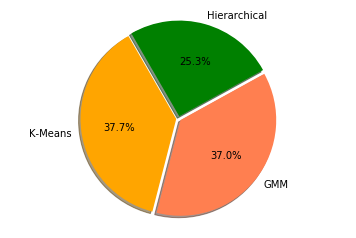

In [34]:
import matplotlib.pyplot as plt
slices_hours = [A4, A5, A6]
activities = ['K-Means', 'GMM', 'Hierarchical']
explode = (0.025, 0.025, 0.025)
colors = ['orange', 'coral','green']
fig1, ax1 = plt.subplots()
ax1.pie(slices_hours, explode=explode,colors=colors, labels=activities, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax1.axis('equal') 
plt.show()

## c) Deep Autoencoders with 5 layers and Non-Linear Activation Function:-

In [35]:
neural_network=Neural_Net(5, [29,21,14,21,29], [None,"sigmoid","sigmoid","sigmoid","sigmoid"],"mean_squared","NonLinear_Activation")

In [36]:
ds.shape
# df1=df1[0:24000]
df1.values.shape

(24998, 29)

In [37]:
neural_network.train_Neural_net(df1.values,100,0.0001)

Iter 0 : 0.7800057715449265
Iter 1 : 0.6620159200290255
Iter 2 : 0.5824583640737169
Iter 3 : 0.5179509705077892
Iter 4 : 0.4941173758138934
Iter 5 : 0.4837002949044003
Iter 6 : 0.4763411090230239
Iter 7 : 0.4673512233609452
Iter 8 : 0.46172056464856914
Iter 9 : 0.4576435061140682
Iter 10 : 0.4549152127979187
Iter 11 : 0.4527163045607994
Iter 12 : 0.45086679294140114
Iter 13 : 0.4491882692310288
Iter 14 : 0.4475353104944117
Iter 15 : 0.4457410769157139
Iter 16 : 0.44346805864200955
Iter 17 : 0.43968528110026905
Iter 18 : 0.4321192872451022
Iter 19 : 0.4255223293769934
Iter 20 : 0.42287114261385333
Iter 21 : 0.4203981435461164
Iter 22 : 0.4173850650089229
Iter 23 : 0.414264312783728
Iter 24 : 0.41192830240421
Iter 25 : 0.4100567761490797
Iter 26 : 0.40846980907841623
Iter 27 : 0.4070882932144601
Iter 28 : 0.40586774296425876
Iter 29 : 0.40477021861753154
Iter 30 : 0.403771840963288
Iter 31 : 0.4028547918160978
Iter 32 : 0.40200595403197925
Iter 33 : 0.4012150013187027
Iter 34 : 0.4004738

In [38]:
neural_network.error

0.3765431856492171

In [39]:
neural_network.layers[-1].activations.shape

(24998, 29)

### Saving weights and biases in Numpy files:-

In [ ]:
# for i in range(neural_network.Layer_count):
#     np.save('weight'+str(i)+'.npy',neural_network.layers[i].Layerwise_weights)
#     np.save('bias'+str(i)+'.npy',neural_network.layers[i].Layerwise_bias)

### Loading saved weights and biases from Numpy files:-

In [ ]:
# for i in range(neural_network.Layer_count):
#     neural_network.layers[i].Layerwise_weights = np.load('weight'+str(i)+'.npy')
#     neural_network.layers[i].Layerwise_bias = np.load('bias'+str(i)+'.npy')

In [40]:
neural_network.layers[0].activations.shape

(24998, 29)

In [41]:
neural_network.layers[0].activations.shape

(24998, 29)

In [42]:
# neural_network.layers[0].activations-neural_network.layers[-1].activations

In [43]:
neural_network.forward_propagation(df1)

In [44]:
ans=neural_network.layers[2].activations

In [45]:
ans.shape

(24998, 14)

## Part 2 : K-Means Clustering:-

In [54]:
k=5
n = ans.shape[0]
c = ans.shape[1]
mean = np.mean(ans, axis = 0)
std = np.std(ans, axis = 0)
centers = np.random.randn(k,c)*std + mean
# plt.scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

In [55]:
from copy import deepcopy
co = np.zeros(centers.shape)
cn = deepcopy(centers) 
# ans.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))
marg = LA.norm(cn - co)
while marg != 0:
    for i in range(k):
        distances[:,i] = LA.norm(ans - cn[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    co = deepcopy(cn)
    for i in range(k):
        cn[i] = np.mean(ans[clusters == i], axis=0)
    marg = LA.norm(cn - co)
# centers_new   
# plt.scatter(cn[:,0], cn[:,1], marker='*', c='r', s=150)
print(clusters)

[1 0 1 ... 3 2 4]


In [56]:
np.unique(clusters)

array([0, 1, 2, 3, 4])

In [57]:
kmlist=[]
for i in range(len(label)):
    if label[i]=='dos':
        kmlist.append(0)
    if label[i]=='normal':
        kmlist.append(1)
    if label[i]=='probe':
        kmlist.append(2)
    if label[i]=='r2l':
        kmlist.append(3)
    if label[i]=='u2r':
        kmlist.append(4)
len(kmlist)

24998

In [58]:
from sklearn.metrics.cluster import contingency_matrix
res=contingency_matrix(clusters,kmlist)
# print(res)
for i,item in enumerate(res):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  47.081043956043956
Purity of Cluster - 1 :  92.9610829103215
Purity of Cluster - 2 :  61.33177570093458
Purity of Cluster - 3 :  80.58071390516783
Purity of Cluster - 4 :  98.46354544136831


In [59]:
pure=0
for i in res:
    pure+=max(i)
#     print(max(i))
A7=pure/len(label)
print('K-means Purity:', A7)

K-means Purity: 0.8402672213777103


## Part 3 :  Gaussian Mixture Model (GMM):-

In [60]:
from sklearn.mixture import GaussianMixture
GMM=GaussianMixture(n_components=5).fit(ans)
gmmlabel=GMM.predict(ans)
np.unique(gmmlabel)

array([0, 1, 2, 3, 4])

In [61]:
res1=contingency_matrix(gmmlabel,kmlist)
# print(res1)
for i,item in enumerate(res1):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  61.97440585009141
Purity of Cluster - 1 :  100.0
Purity of Cluster - 2 :  76.3317191283293
Purity of Cluster - 3 :  99.9826659733056
Purity of Cluster - 4 :  70.15503875968992


In [62]:
pure1=0
for i in res1:
    pure1+=max(i)
#     print(max(i))
A8=pure1/len(label)
print('GMM Purity:', A8)

GMM Purity: 0.8432274581966557


## Part 4 :  Hierarchical Clustering:-

In [63]:
from sklearn.cluster import AgglomerativeClustering
cc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
aclabel=cc.fit_predict(ans)
np.unique(aclabel)

array([0, 1, 2, 3, 4])

In [64]:
res2=contingency_matrix(aclabel,kmlist)
# print(res2)
for i,item in enumerate(res2):
    print("Purity of Cluster -",i,": ",max(item)*100/sum(item))

Purity of Cluster - 0 :  53.478226064681394
Purity of Cluster - 1 :  100.0
Purity of Cluster - 2 :  100.0
Purity of Cluster - 3 :  100.0
Purity of Cluster - 4 :  100.0


In [65]:
pure2=0
for i in res2:
    pure2+=max(i)
#     print(max(i))
A9=pure2/len(label)
print('Hierarchical Purity:', A9)

Hierarchical Purity: 0.5350428034242739


## Part 5 :  Pie Chart (K-means v/s GMM v/s Hierarchical) :-

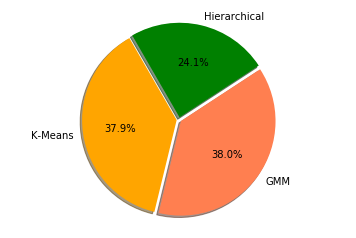

In [66]:
import matplotlib.pyplot as plt
slices_hours = [A7, A8, A9]
activities = ['K-Means', 'GMM', 'Hierarchical']
explode = (0.025, 0.025, 0.025)
colors = ['orange', 'coral','green']
fig1, ax1 = plt.subplots()
ax1.pie(slices_hours, explode=explode,colors=colors, labels=activities, autopct='%1.1f%%',
        shadow=True, startangle=120)
ax1.axis('equal') 
plt.show()